___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [10]:
df2 = df.drop(["RowNumber","CustomerId","Surname",],axis=1)

In [11]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


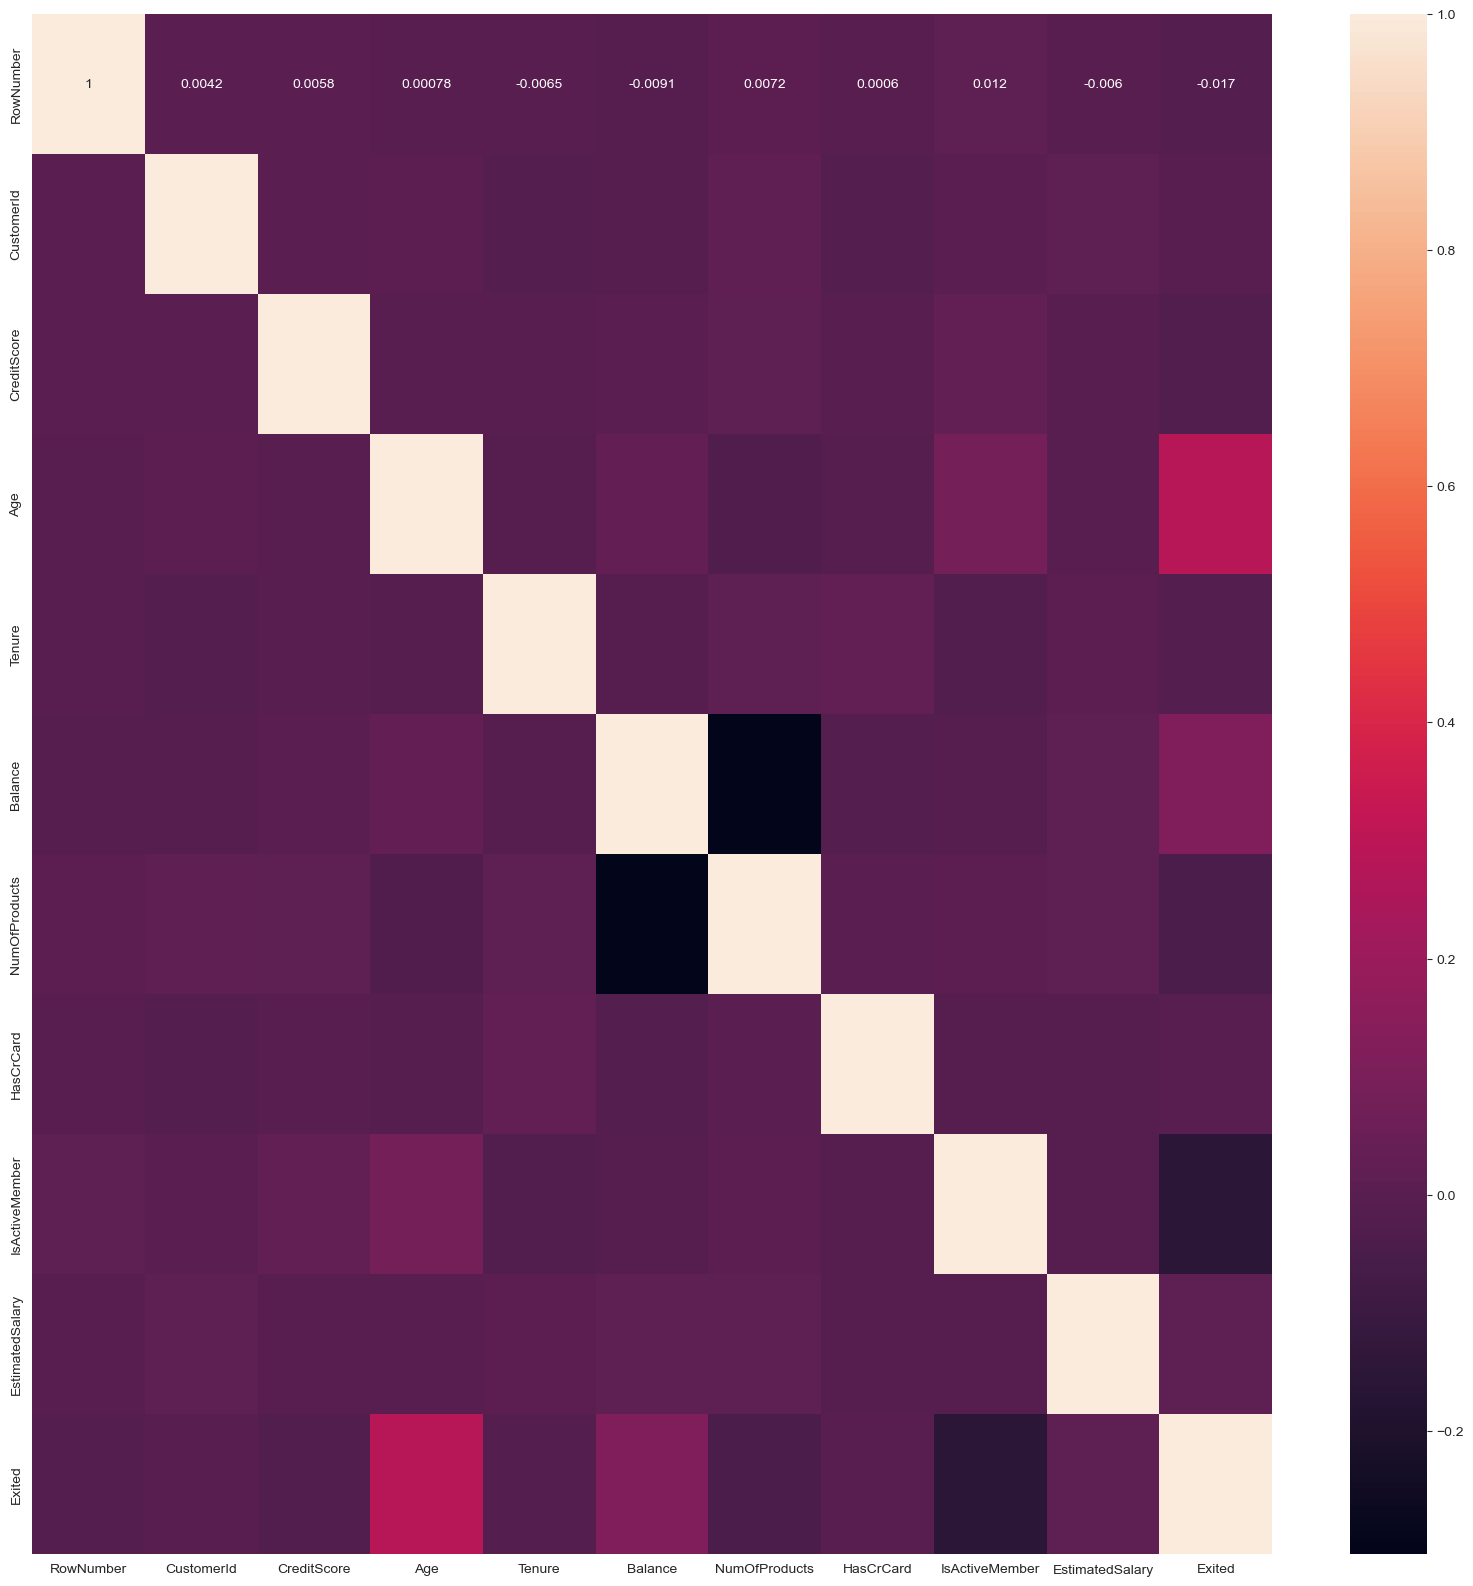

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check the data types of each column
print(df.dtypes)

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


['Female' 'Male']


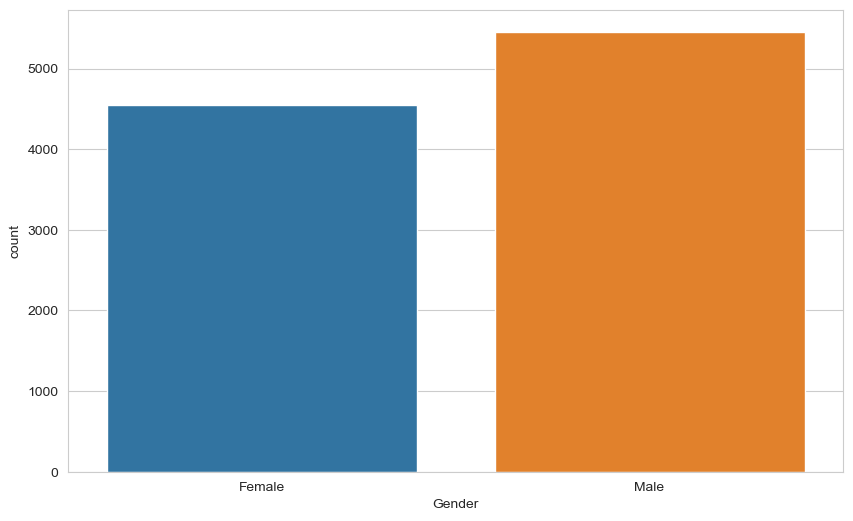

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the "Gender" column is consistent
print(df["Gender"].unique())

# Convert "Gender" column to categorical type
df["Gender"] = df["Gender"].astype('category')

# Plot countplot
sns.countplot(x="Gender", data=df)
plt.show()


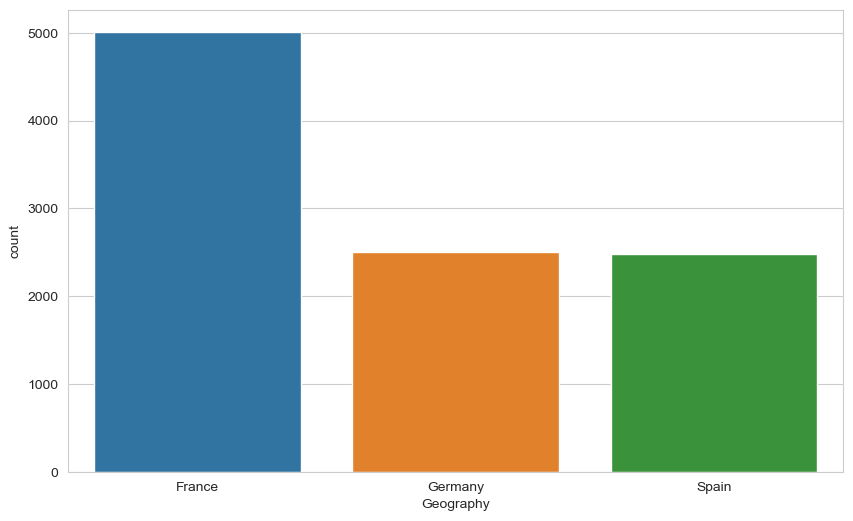

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the "Geography" column is treated as categorical data
df["Geography"] = df["Geography"].astype('category')

# Plot countplot using the 'x' parameter to specify the column
sns.countplot(x="Geography", data=df)
plt.show()


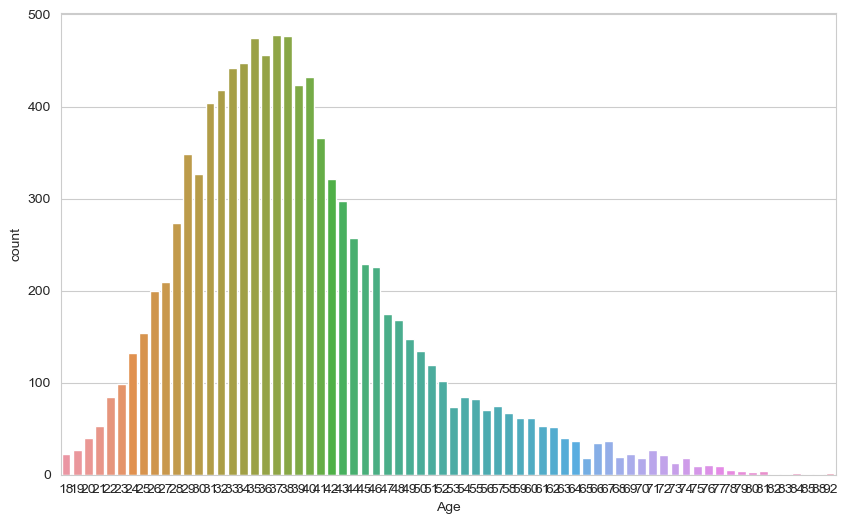

In [15]:
#sns.countplot(df["Age"])
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the "Geography" column is treated as categorical data
df["Age"] = df["Age"].astype('category')

# Plot countplot using the 'x' parameter to specify the column
sns.countplot(x="Age", data=df)
plt.show()

<Axes: >

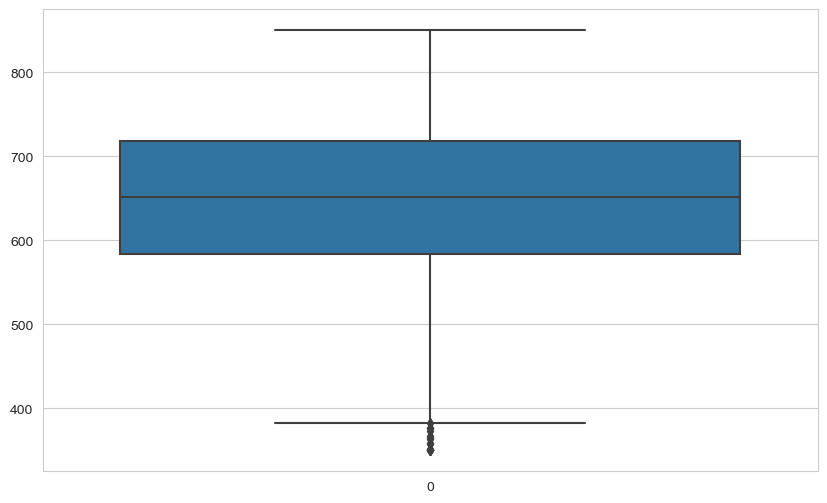

In [16]:
sns.boxplot(df["CreditScore"])

<Axes: >

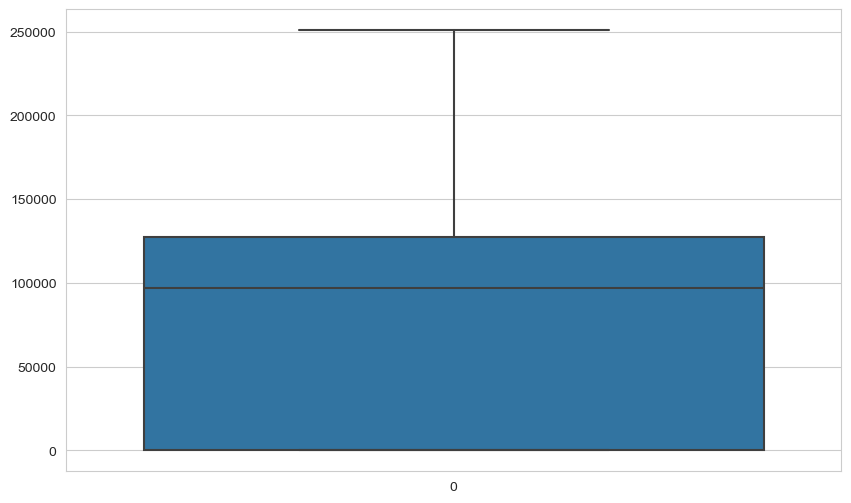

In [17]:
sns.boxplot(df["Balance"])

<Axes: >

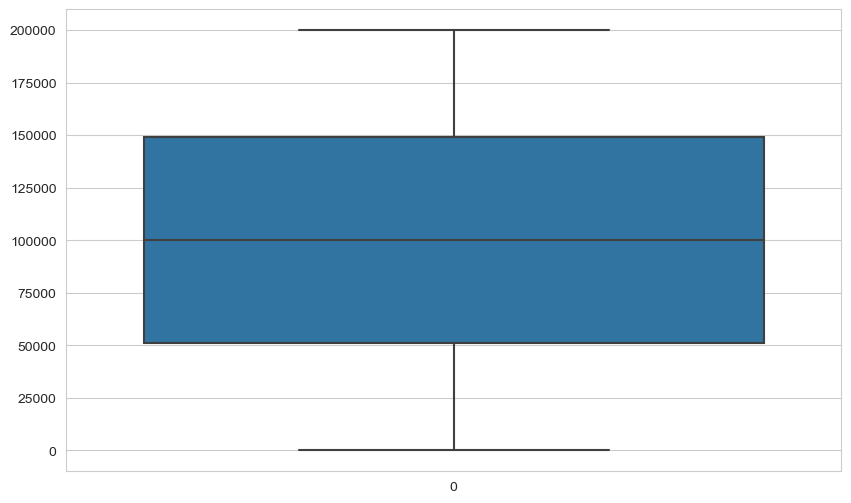

In [18]:
sns.boxplot(df["EstimatedSalary"])

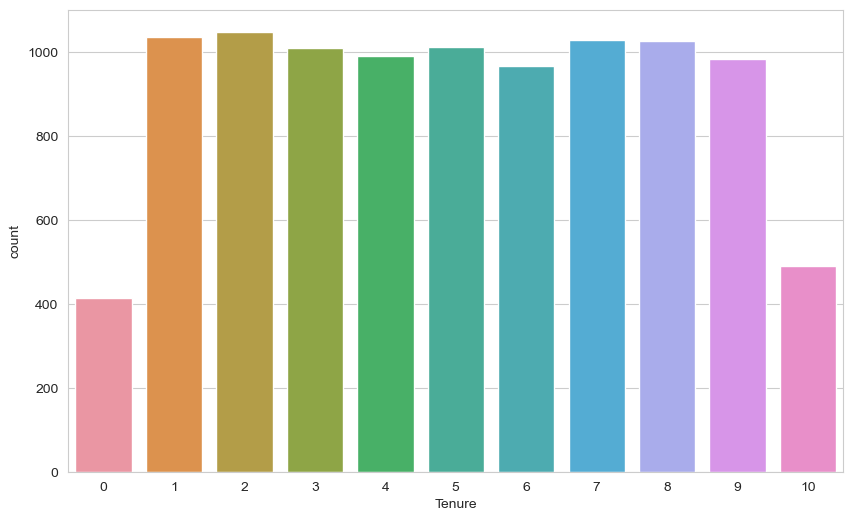

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate and display the count plot
sns.countplot(x="Tenure", data=df)
plt.show()


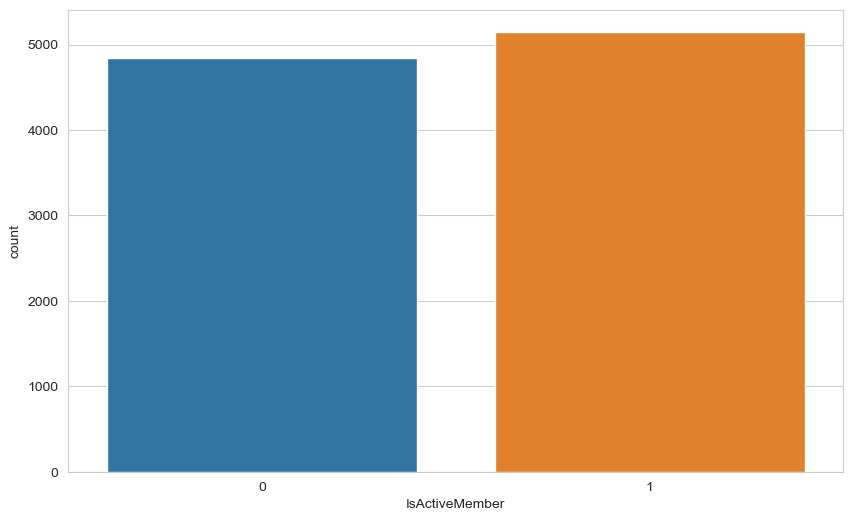

In [20]:
# Ensure "IsActiveMember" is treated as a categorical variable
df["IsActiveMember"] = df["IsActiveMember"].astype('category')

# Generate and display the count plot
sns.countplot(x="IsActiveMember", data=df)
plt.show()


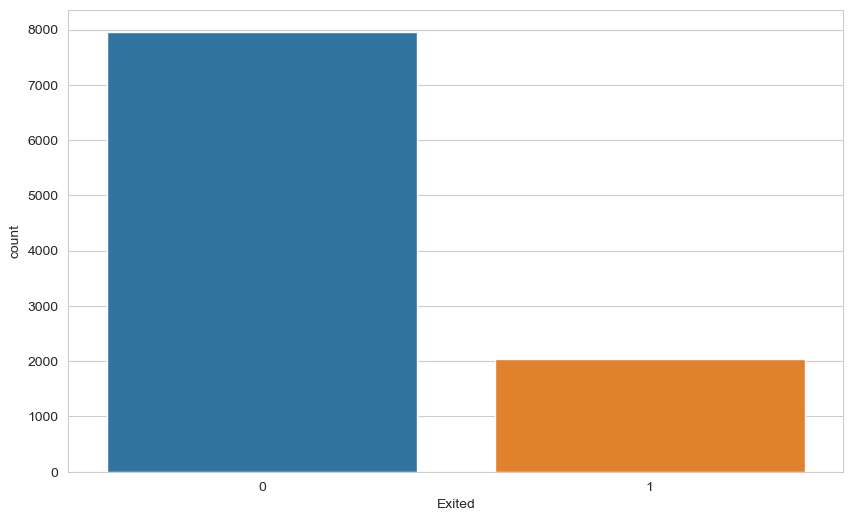

In [21]:
# Ensure "Exited" is treated as a categorical variable
df["Exited"] = df["Exited"].astype('category')

# Generate and display the count plot
sns.countplot(x="Exited", data=df)
plt.show()


In [22]:
df2.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [24]:
print(df["Gender"].unique())  # This should print the unique values in the Gender column
print(df["Exited"].unique())  # This should print the unique values in the Exited column


['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[1, 0]
Categories (2, int64): [0, 1]


In [25]:
print(df["Gender"].dtype)  # Check the data type of the Gender column
print(df["Exited"].dtype)  # Check the data type of the Exited column


category
category


In [26]:
df["Gender"] = df["Gender"].astype('category')
df["Exited"] = df["Exited"].astype('category')


AttributeError: 'int' object has no attribute 'startswith'

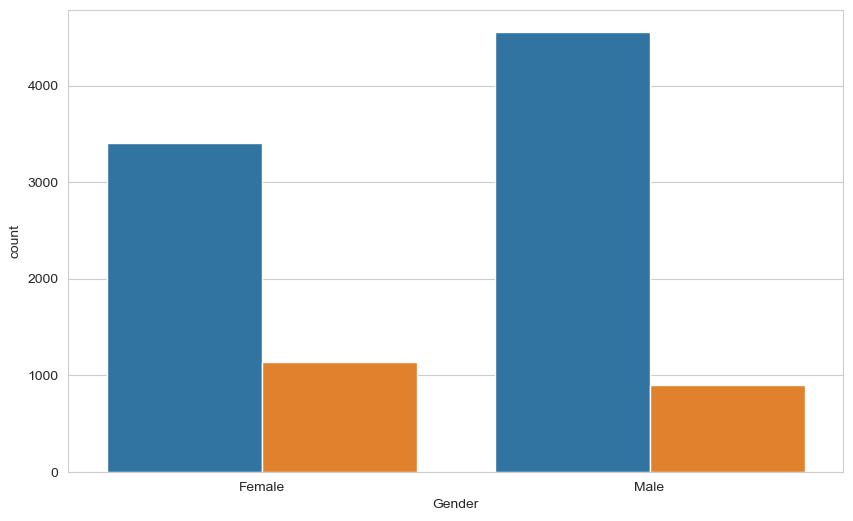

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Gender", hue="Exited", data=df)
plt.show()


In [41]:
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender Age  Tenure  \
0          1    15634602  Hargrave          619    France  Female  42       2   
1          2    15647311      Hill          608     Spain  Female  41       1   
2          3    15619304      Onio          502    France  Female  42       8   
3          4    15701354      Boni          699    France  Female  39       1   
4          5    15737888  Mitchell          850     Spain  Female  43       2   

     Balance  NumOfProducts  HasCrCard IsActiveMember  EstimatedSalary Exited  
0      0.000              1          1              1       101348.880      1  
1  83807.860              1          0              1       112542.580      0  
2 159660.800              3          1              0       113931.570      1  
3      0.000              2          0              0        93826.630      0  
4 125510.820              1          1              1        79084.100      0  


In [42]:
# Check for missing values
print(df.isnull().sum())


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [35]:
100* df2.isnull().sum()/len(df2)

CreditScore       0.000
Geography         0.000
Gender            0.000
Age               0.000
Tenure            0.000
Balance           0.000
NumOfProducts     0.000
HasCrCard         0.000
IsActiveMember    0.000
EstimatedSalary   0.000
Exited            0.000
dtype: float64

In [36]:
#AGE DROP EDİLEBİLİR df2 = df2.drop("Age",axis=1)

In [37]:
df2 = pd.get_dummies(df2, columns=["Geography","Gender"])

In [38]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,True,False,False,True,False
1,608,41,1,83807.860,1,0,1,112542.580,0,False,False,True,True,False
2,502,42,8,159660.800,3,1,0,113931.570,1,True,False,False,True,False
3,699,39,1,0.000,2,0,0,93826.630,0,True,False,False,True,False
4,850,43,2,125510.820,1,1,1,79084.100,0,False,False,True,True,False


In [39]:
df2 = df2.drop("Age",axis=1)

In [40]:
df2.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,2,0.000,1,1,1,101348.880,1,True,False,False,True,False
1,608,1,83807.860,1,0,1,112542.580,0,False,False,True,True,False
2,502,8,159660.800,3,1,0,113931.570,1,True,False,False,True,False
3,699,1,0.000,2,0,0,93826.630,0,True,False,False,True,False
4,850,2,125510.820,1,1,1,79084.100,0,False,False,True,True,False


# Preprocessing of Data
- Train | Test Split, Scalling

In [43]:
X = df2.drop("Exited",axis=1)

y = df2["Exited"]

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
scaler.fit(X_train)

MinMaxScaler()

In [48]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [52]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.0 MB 4.1 MB/s eta 0:01:33
   ---------------------------------------- 0.5/385.0 MB 5.1 MB/s eta 0:01:16
   ---------------------------------------- 0.8/385.0 MB 5.9 MB/s eta 0:01:06
   ---------------------------------------- 1.2/385.0 MB 6.2 MB/s eta 0:01:02
   ---------------------------------------- 1.5/385.0 MB 6.5 MB/s eta 0:01:00
   ---------------------------------------- 1.9/385.0 MB 6.5 MB/s eta 0:00:59
   ---------------------------------------- 2.2/385.0 MB 6.6 MB/s eta 0:00:58
   ---------------------------------------- 2.5/385.0 MB 6.7 MB/s eta 0:00:57
   -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [53]:
import tensorflow as tf
print(tf.__version__)


2.17.0


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6024 - loss: 0.6768
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7199 - loss: 0.5751 
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7772 - loss: 0.5106 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8309 - loss: 0.4594 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 0.4188 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8487 - loss: 0.3987 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8823 - loss: 0.3509 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8825 - loss: 0.3309 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8865 - loss: 0.3283 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8831 - loss: 0.3292 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


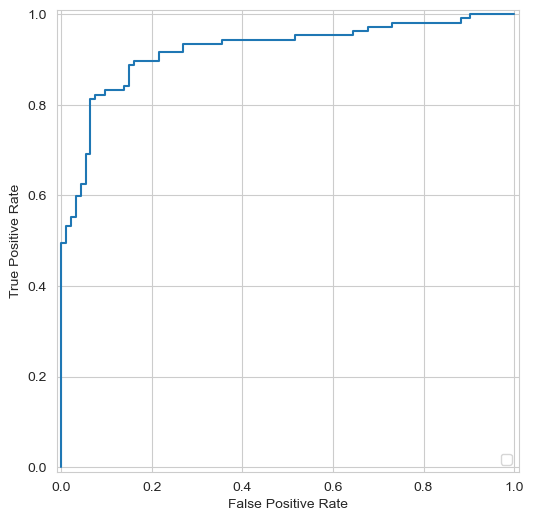

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        93
           1       0.94      0.81      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200

[[87  6]
 [20 87]]


In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a synthetic dataset for example purposes
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(32, input_dim=X.shape[1], activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Get the model's predicted probabilities for the positive class
y_pred_proba = model.predict(X_test)[:, 0]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

# Get predicted classes
y_pred = (y_pred_proba > 0.5).astype(int)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [57]:
X_train.shape

(800, 20)

In [58]:
y_train.shape

(800,)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [59]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X_train is already defined
# X_train should be your training dataset

# Define the model
model = Sequential()
model.add(Dense(30, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# (Optional) Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,111 (4.34 KB)

 Trainable params: 1,111 (4.34 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4724 - loss: 0.7224 - val_accuracy: 0.6100 - val_loss: 0.6322
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7257 - loss: 0.5906 - val_accuracy: 0.7450 - val_loss: 0.5575
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8102 - loss: 0.5026 - val_accuracy: 0.7500 - val_loss: 0.4986
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8190 - loss: 0.4529 - val_accuracy: 0.7900 - val_loss: 0.4549
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8393 - loss: 0.4080 - val_accuracy: 0.8050 - val_loss: 0.4262
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8709 - loss: 0.3411 - val_accuracy: 0.8150 - val_loss: 0.4048
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8813 - loss: 0.3407 - val_accuracy: 0.8150 - val_loss: 0.3940
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8858 - loss: 0.3183 - val_accuracy: 0.8250 - 

In [64]:
model_loss = pd.DataFrame(model.history.history)

In [65]:
model_loss.head()

,accuracy,loss,val_accuracy,val_loss
0,0.555,0.678,0.610,0.632
1,0.730,0.573,0.745,0.557
2,0.805,0.497,0.750,0.499
3,0.825,0.437,0.790,0.455
4,0.849,0.390,0.805,0.426


In [66]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,335 (13.03 KB)

 Trainable params: 1,111 (4.34 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,224 (8.69 KB)

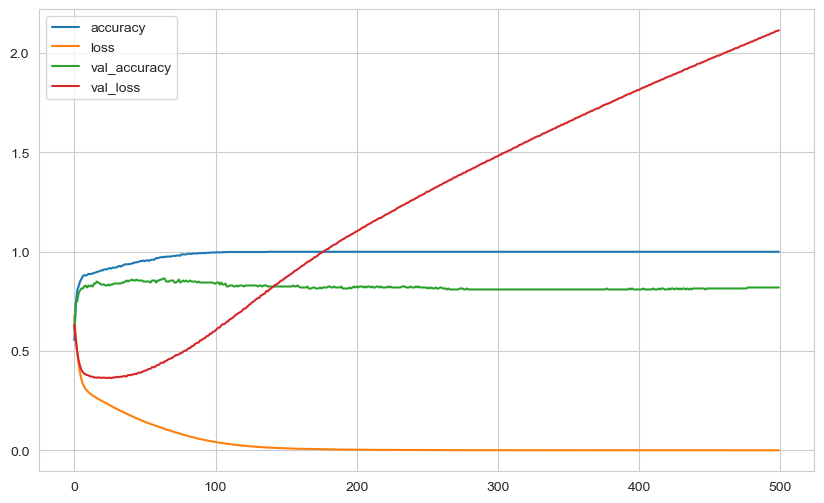

In [67]:
model_loss.plot();

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [68]:
from sklearn.utils import class_weight

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(101)

model = Sequential()
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])


In [72]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.9828009828009828, 1: 1.0178117048346056}

In [74]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model.fit(x=X_train,
          y=y_train,
          validation_split=0.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - Recall: 0.3782 - loss: 0.7352 - val_Recall: 0.3889 - val_loss: 0.7232
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Recall: 0.4233 - loss: 0.7009 - val_Recall: 0.4722 - val_loss: 0.6961
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - Recall: 0.4709 - loss: 0.6719 - val_Recall: 0.5000 - val_loss: 0.6714
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Recall: 0.5414 - loss: 0.6465 - val_Recall: 0.5278 - val_loss: 0.6493
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Recall: 0.5888 - loss: 0.6239 - val_Recall: 0.5833 - val_loss: 0.6290
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - Recall: 0.6301 - loss: 0.6035 - val_Recall: 0.6111 - val_loss: 0.6097
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Recall: 0.6578 - loss: 0.5849 - val_Recall: 0.6111 - val_loss: 0.5918
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Recall: 0.6777 - loss: 0.5677 - val_Recall: 0.6389 - val_loss: 0.5749
Epoch 9/200
6/6 ━━━━━━━━━━━━━━

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

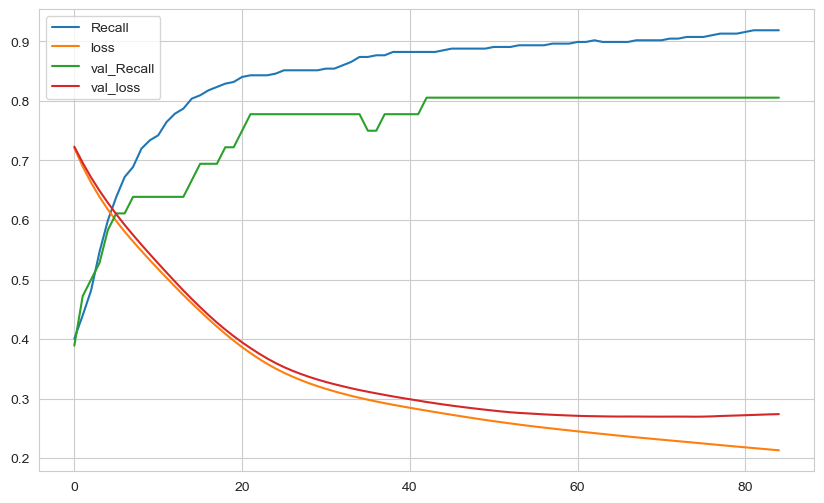

In [75]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [76]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


#      precision    recall  f1-score   support

#  0       0.86      0.97      0.92       796
#  1       0.79      0.41      0.54       204


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[[80 13]
 [16 91]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        93
           1       0.88      0.85      0.86       107

    accuracy                           0.85       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - Recall: 0.4840 - accuracy: 0.5160 - loss: 0.7810 - val_Recall: 0.8611 - val_accuracy: 0.8625 - val_loss: 0.4553
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - Recall: 0.7270 - accuracy: 0.7625 - loss: 0.5079 - val_Recall: 0.8056 - val_accuracy: 0.8750 - val_loss: 0.3317
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Recall: 0.8036 - accuracy: 0.8300 - loss: 0.4481 - val_Recall: 0.8333 - val_accuracy: 0.8750 - val_loss: 0.2781
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - Recall: 0.8028 - accuracy: 0.8188 - loss: 0.4182 - val_Recall: 0.8333 - val_accuracy: 0.8750 - val_loss: 0.2691
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - Recall: 0.8406 - accuracy: 0.8432 - loss: 0.3640 - val_Recall: 0.8333 - val_accuracy: 0.8875 - val_loss: 0.2639
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - Recall: 0.8565 - accuracy: 0.8662 - loss: 0.3422 - val_Recall: 0.8333 - val_accuracy: 0.8875 - val_loss: 0.2676
Epoch 7/200
6/6

KeyError: "None of [Index(['recall', 'val_recall'], dtype='object')] are in the [columns]"

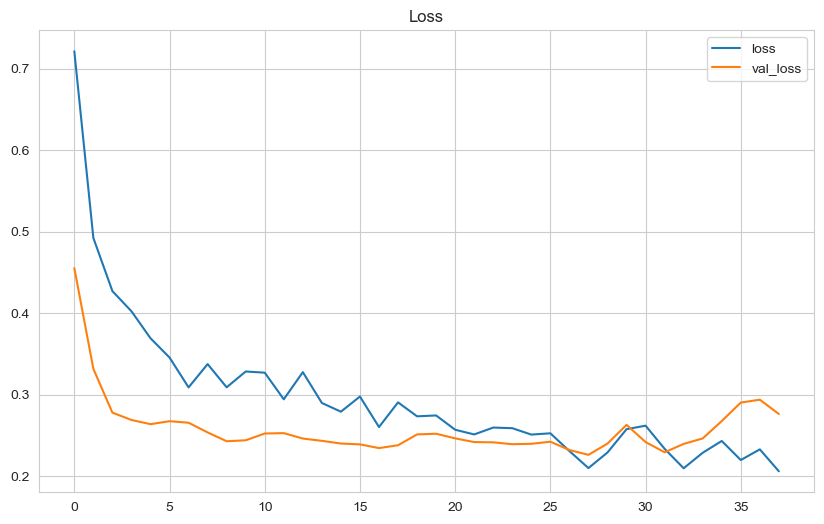

In [91]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

# Define the model with increased learning rate, dropout, and early stopping
def create_model_with_dropout(learning_rate=0.01, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'Recall'])
    return model

# Create the model with increased learning rate and dropout
model_with_dropout = create_model_with_dropout()

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Fit the model
history_with_dropout = model_with_dropout.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=128, verbose=1,
                                              class_weight=class_weights, callbacks=[early_stop])

# Plot loss and recall
loss_df = pd.DataFrame(history_with_dropout.history)
loss_df[['loss', 'val_loss']].plot(title='Loss')
loss_df[['recall', 'val_recall']].plot(title='Recall')

# Evaluate the model
y_pred_with_dropout = (model_with_dropout.predict(X_test) > 0.5).astype("int32")
print("Model with Increased Learning Rate and Dropout")
print(confusion_matrix(y_test, y_pred_with_dropout))
print(classification_report(y_test, y_pred_with_dropout))


### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## Optuna

In [93]:
pip install optuna


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/380.1 kB ? eta -:--:--
   ------- -------------------------------- 71.7/380.1 kB 1.9 MB/s eta 0:00:01
   ------------------------- -------------- 245.8/380.1 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 380.1/380.1 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.0 kB ? eta -:--:--
   -------------------------------------- - 225.3/233.0 kB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 233.0/233.0 kB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.6 kB ? eta -:--:--
   ---------------------------------------- 78.6/78.6 kB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [94]:
pip install keras tensorflow scikit-learn pandas numpy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.5717 - loss: 0.7202 - recall_3: 0.6178 - val_accuracy: 0.8875 - val_loss: 0.4113 - val_recall_3: 0.8056
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7712 - loss: 0.4908 - recall_3: 0.7613 - val_accuracy: 0.8875 - val_loss: 0.2998 - val_recall_3: 0.7778
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8156 - loss: 0.4100 - recall_3: 0.8101 - val_accuracy: 0.8750 - val_loss: 0.2561 - val_recall_3: 0.7778
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8542 - loss: 0.4204 - recall_3: 0.8379 - val_accuracy: 0.9000 - val_loss: 0.2475 - val_recall_3: 0.8333
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8735 - loss: 0.3715 - recall_3: 0.8697 - val_accuracy: 0.9000 - val_loss: 0.2476 - val_recall_3: 0.8333
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8529 - loss: 0.3647 - recall_3: 0.8371 - val_accuracy: 0.9000 - val_loss: 0.2516 - val_recall_3:

KeyError: "None of [Index(['recall', 'val_recall'], dtype='object')] are in the [columns]"

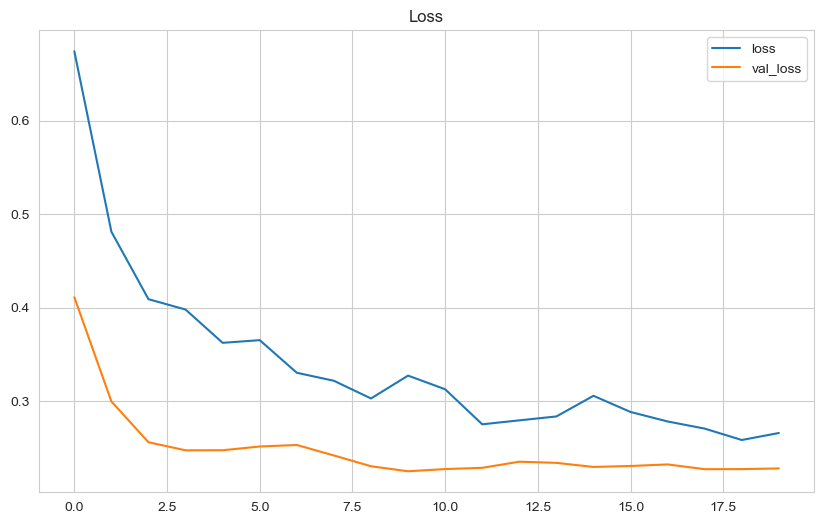

In [97]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.metrics import Recall
from sklearn.metrics import confusion_matrix, classification_report
import optuna
from optuna_integration.keras import KerasPruningCallback

# Assume X_train, y_train, X_test, y_test, class_weights are already defined

# Define the model with increased learning rate, dropout, and early stopping
def create_model_with_dropout(learning_rate=0.01, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Recall()])
    return model

# Create the model with increased learning rate and dropout
model_with_dropout = create_model_with_dropout()

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Fit the model
history_with_dropout = model_with_dropout.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=128, verbose=1,
                                              class_weight=class_weights, callbacks=[early_stop])

# Plot loss and recall
loss_df = pd.DataFrame(history_with_dropout.history)
loss_df[['loss', 'val_loss']].plot(title='Loss')
loss_df[['recall', 'val_recall']].plot(title='Recall')

# Evaluate the model
y_pred_with_dropout = (model_with_dropout.predict(X_test) > 0.5).astype("int32")
print("Model with Increased Learning Rate and Dropout")
print(confusion_matrix(y_test, y_pred_with_dropout))
print(classification_report(y_test, y_pred_with_dropout))

# Define an objective function for Optuna
def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.5)

    model = create_model_with_dropout(learning_rate, dropout_rate)
    
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    pruning_callback = KerasPruningCallback(trial, 'val_loss')

    history = model.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=128, verbose=1,
                        class_weight=class_weights, callbacks=[early_stop, pruning_callback])
    
    val_loss = np.min(history.history['val_loss'])
    return val_loss

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Print the best parameters found by Optuna
print("Best parameters found by Optuna:")
print(study.best_params)

# Train the final model with the best parameters
best_learning_rate = study.best_params['learning_rate']
best_dropout_rate = study.best_params['dropout_rate']

model_final = create_model_with_dropout(best_learning_rate, best_dropout_rate)

history_final = model_final.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=128, verbose=1,
                                class_weight=class_weights, callbacks=[early_stop])

# Evaluate the final model
y_pred_final = (model_final.predict(X_test) > 0.5).astype("int32")
print("Final Model with Best Parameters from Optuna")
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.5791 - loss: 0.6907 - recall_4: 0.5689 - val_accuracy: 0.8375 - val_loss: 0.4342 - val_recall_4: 0.7778
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8065 - loss: 0.4763 - recall_4: 0.8025 - val_accuracy: 0.8500 - val_loss: 0.3197 - val_recall_4: 0.7778
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8301 - loss: 0.4338 - recall_4: 0.8103 - val_accuracy: 0.8750 - val_loss: 0.2810 - val_recall_4: 0.7778
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8586 - loss: 0.3525 - recall_4: 0.8387 - val_accuracy: 0.9000 - val_loss: 0.2620 - val_recall_4: 0.8333
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8602 - loss: 0.3514 - recall_4: 0.8435 - val_accuracy: 0.9000 - val_loss: 0.2500 - val_recall_4: 0.8611
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8669 - loss: 0.3279 - recall_4: 0.8603 - val_accuracy: 0.8875 - val_loss: 0.2468 - val_recall_4:

KeyError: "None of [Index(['recall', 'val_recall'], dtype='object')] are in the [columns]"

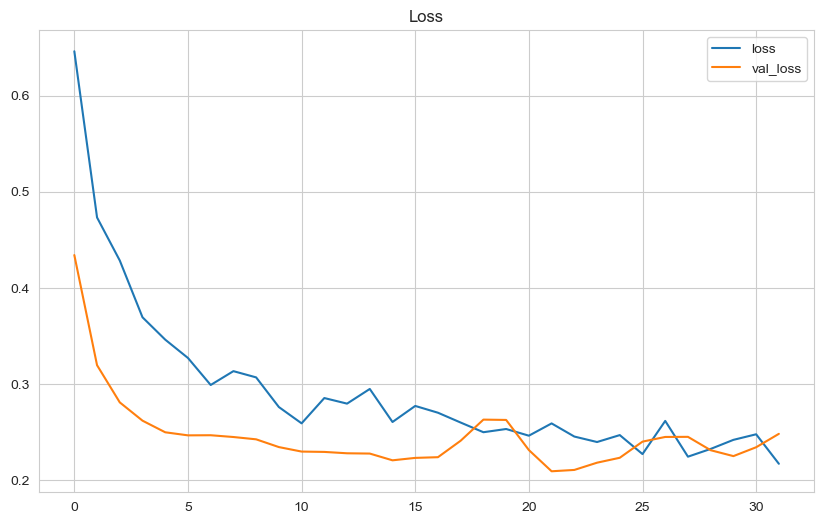

In [98]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.metrics import Recall
from sklearn.metrics import confusion_matrix, classification_report
import optuna
from optuna.integration import KerasPruningCallback

# Assume X_train, y_train, X_test, y_test, class_weights are already defined

# Define the model with increased learning rate, dropout, and early stopping
def create_model_with_dropout(learning_rate=0.01, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Recall()])
    return model

# Create the model with increased learning rate and dropout
model_with_dropout = create_model_with_dropout()

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Fit the model
history_with_dropout = model_with_dropout.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=128, verbose=1,
                                              class_weight=class_weights, callbacks=[early_stop])

# Plot loss and recall
loss_df = pd.DataFrame(history_with_dropout.history)
loss_df[['loss', 'val_loss']].plot(title='Loss')
loss_df[['recall', 'val_recall']].plot(title='Recall')

# Evaluate the model
y_pred_with_dropout = (model_with_dropout.predict(X_test) > 0.5).astype("int32")
print("Model with Increased Learning Rate and Dropout")
print(confusion_matrix(y_test, y_pred_with_dropout))
print(classification_report(y_test, y_pred_with_dropout))

# Define an objective function for Optuna
def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.5)

    model = create_model_with_dropout(learning_rate, dropout_rate)
    
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    pruning_callback = KerasPruningCallback(trial, 'val_loss')

    history = model.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=128, verbose=1,
                        class_weight=class_weights, callbacks=[early_stop, pruning_callback])
    
    val_loss = np.min(history.history['val_loss'])
    return val_loss

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Print the best parameters found by Optuna
print("Best parameters found by Optuna:")
print(study.best_params)

# Train the final model with the best parameters
best_learning_rate = study.best_params['learning_rate']
best_dropout_rate = study.best_params['dropout_rate']

model_final = create_model_with_dropout(best_learning_rate, best_dropout_rate)

history_final = model_final.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=128, verbose=1,
                                class_weight=class_weights, callbacks=[early_stop])

# Evaluate the final model
y_pred_final = (model_final.predict(X_test) > 0.5).astype("int32")
print("Final Model with Best Parameters from Optuna")
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.5239 - loss: 0.7796 - recall_5: 0.5500 - val_accuracy: 0.8375 - val_loss: 0.4580 - val_recall_5: 0.7222
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7421 - loss: 0.5067 - recall_5: 0.7140 - val_accuracy: 0.8875 - val_loss: 0.3440 - val_recall_5: 0.8056
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8465 - loss: 0.3961 - recall_5: 0.8161 - val_accuracy: 0.8750 - val_loss: 0.2861 - val_recall_5: 0.8056
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8429 - loss: 0.3848 - recall_5: 0.8474 - val_accuracy: 0.8875 - val_loss: 0.2761 - val_recall_5: 0.8333
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8703 - loss: 0.3696 - recall_5: 0.8576 - val_accuracy: 0.8750 - val_loss: 0.2885 - val_recall_5: 0.8056
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8611 - loss: 0.3629 - recall_5: 0.8592 - val_accuracy: 0.8875 - val_loss: 0.3019 - val_recall_5:

KeyError: "None of [Index(['recall', 'val_recall'], dtype='object')] are in the [columns]"

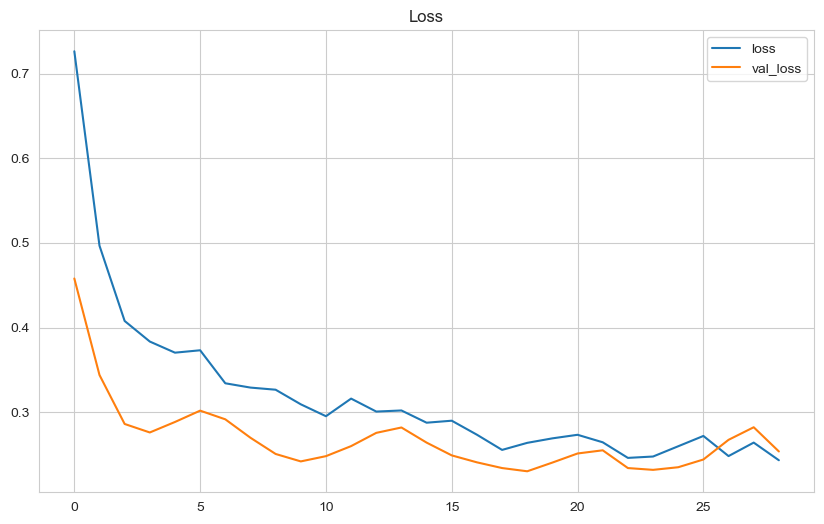

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.metrics import Recall
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import optuna
from optuna.integration import KerasPruningCallback

# Assume X_train, y_train, X_test, y_test, class_weights are already defined

# Define the model with increased learning rate, dropout, and early stopping
def create_model_with_dropout(learning_rate=0.01, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Recall()])
    return model

# Create the model with increased learning rate and dropout
model_with_dropout = create_model_with_dropout()

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Fit the model
history_with_dropout = model_with_dropout.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=128, verbose=1,
                                              class_weight=class_weights, callbacks=[early_stop])

# Plot loss and recall
loss_df = pd.DataFrame(history_with_dropout.history)
loss_df[['loss', 'val_loss']].plot(title='Loss')
loss_df[['recall', 'val_recall']].plot(title='Recall')
plt.show()

# Evaluate the model
y_pred_with_dropout = (model_with_dropout.predict(X_test) > 0.5).astype("int32")
print("Model with Increased Learning Rate and Dropout")
print(confusion_matrix(y_test, y_pred_with_dropout))
print(classification_report(y_test, y_pred_with_dropout))

# Define an objective function for Optuna
def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.5)

    model = create_model_with_dropout(learning_rate, dropout_rate)
    
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    pruning_callback = KerasPruningCallback(trial, 'val_loss')

    history = model.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=128, verbose=1,
                        class_weight=class_weights, callbacks=[early_stop, pruning_callback])
    
    val_loss = np.min(history.history['val_loss'])
    return val_loss

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Print the best parameters found by Optuna
print("Best parameters found by Optuna:")
print(study.best_params)

# Train the final model with the best parameters
best_learning_rate = study.best_params['learning_rate']
best_dropout_rate = study.best_params['dropout_rate']

model_final = create_model_with_dropout(best_learning_rate, best_dropout_rate)

history_final = model_final.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=128, verbose=1,
                                class_weight=class_weights, callbacks=[early_stop])

# Evaluate the final model
y_pred_final = (model_final.predict(X_test) > 0.5).astype("int32")
print("Final Model with Best Parameters from Optuna")
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

# Plot ROC curve and calculate AUC
y_pred_proba = model_final.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print("AUC: {:.2f}".format(roc_auc))


# Final Model and Model Deployment

In [100]:
import pickle
pickle.dump(scaler, open("churn_prediction", 'wb'))

In [101]:
tf.random.set_seed(101)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [102]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [105]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9259 - loss: 0.1883 - val_accuracy: 0.8400 - val_loss: 0.3940
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9259 - loss: 0.1852 - val_accuracy: 0.8400 - val_loss: 0.3964
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9305 - loss: 0.1821 - val_accuracy: 0.8350 - val_loss: 0.3989
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9314 - loss: 0.1792 - val_accuracy: 0.8350 - val_loss: 0.4006
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9326 - loss: 0.1760 - val_accuracy: 0.8350 - val_loss: 0.4035
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9326 - loss: 0.1731 - val_accuracy: 0.8350 - val_loss: 0.4063
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9329 - loss: 0.1701 - val_accuracy: 0.8350 - val_loss: 0.4087
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9330 - loss: 0.1675 - val_accuracy: 0.

In [106]:
# Save the model in the native Keras format
model.save('model_churn.keras')


## Prediction

In [107]:
from tensorflow.keras.models import load_model

In [108]:
model_churn = load_model('model_churn.h5')
scaler_churn = pickle.load(open("churn_prediction", "rb"))

In [109]:
single_person = df2.drop('Exited', axis = 1).iloc[0:1, :]
single_person

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,2,0.000,1,1,1,101348.880,True,False,False,True,False


In [110]:
model_churn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now the metrics will be available


In [111]:
df2["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___